## Waste management using cnn model

In [1]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Implimenting Various Libraries
import numpy as np
import pandas as pd
import cv2
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm
from glob import glob


In [4]:
pip install matplotlib 


In [5]:
import matplotlib.pyplot as plt


In [6]:
train_path = r"C:\Users\chinn\OneDrive\Desktop\DATASET\Week-1\dataset\TRAIN"
test_path = r"C:\Users\chinn\OneDrive\Desktop\DATASET\Week-1\dataset\TEST"

In [7]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
import glob


In [8]:
import os
print("Train path exists:", os.path.exists(train_path))

Train path exists: True


In [9]:
from tensorflow.keras.layers import Conv2D


In [10]:
# Visualization
from glob import glob
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:31<00:00, 321.31it/s]


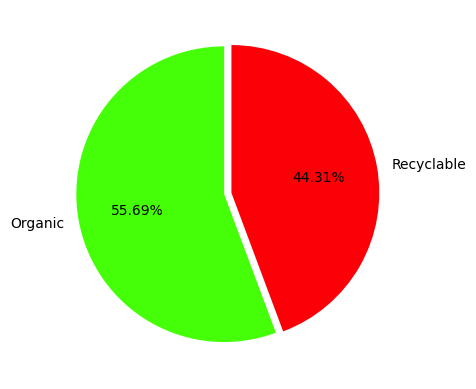

In [11]:
data.shape
colors =['#44FF07','#FB0007']
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'] , startangle=90 , colors=colors,explode=[0,0.05], autopct='%0.2f%%')
plt.show()


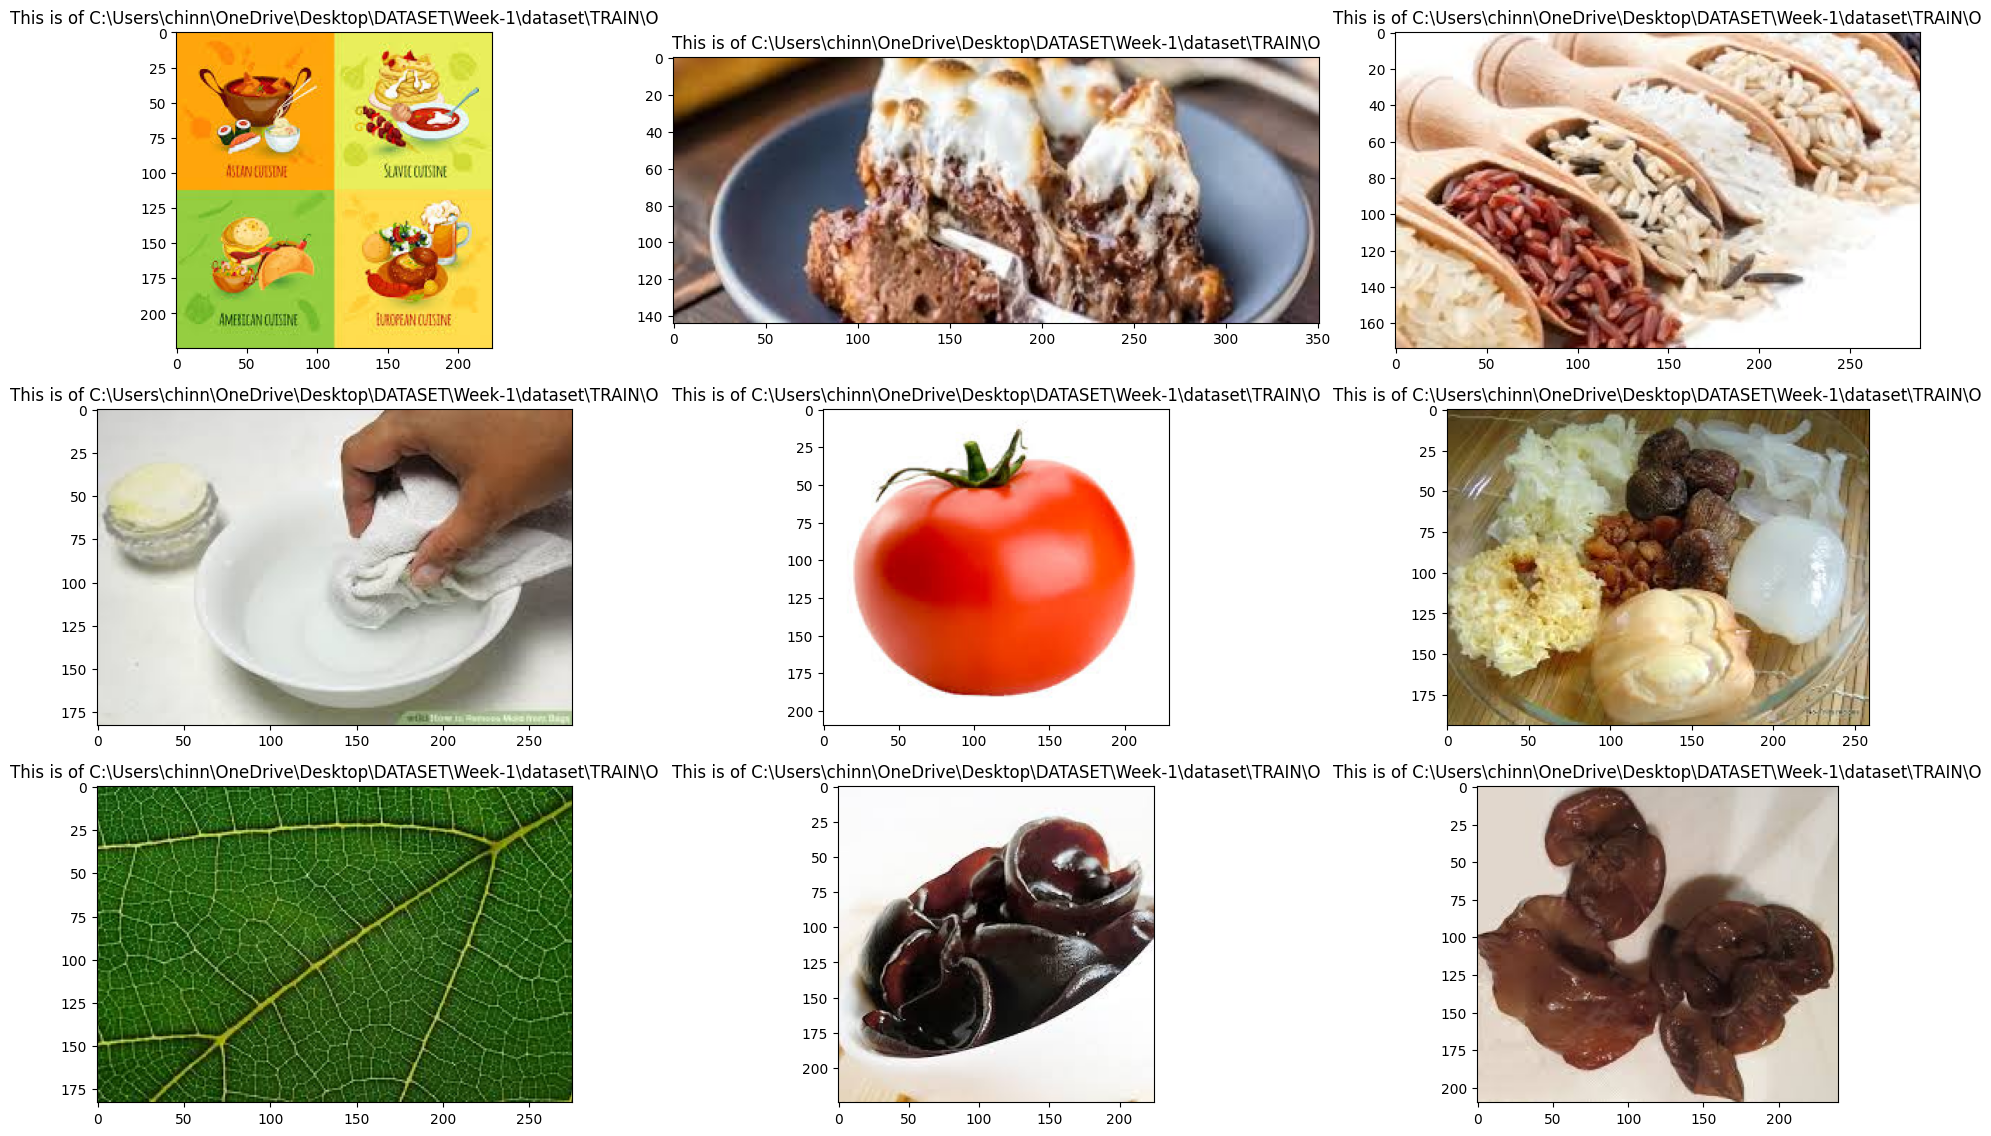

In [12]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network WEEK2

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_generator = datagen.flow(train_images, train_labels, batch_size=batch_size)

NameError: name 'train_images' is not defined

In [26]:
train_generator=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=batch_size,color_mode="rgb",class_mode="categorical")
test_generator=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=batch_size,color_mode="rgb",class_mode="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Enable CPU multi-threading
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["TF_NUM_INTEROP_THREADS"] = "4"
os.environ["TF_NUM_INTRAOP_THREADS"] = "4"

# Use correct image size for MobileNetV2
img_height, img_width = 224, 224  
batch_size = 16  

# Use a pretrained model to avoid slow training
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze layers

# Define model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Change '10' based on number of classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with fewer epochs & multi-threading
hist = model.fit(
    train_generator,
    epochs=5,  # Reduce epochs
    validation_data=test_generator,
    steps_per_epoch=50,
    validation_steps=20
)

# Plot results
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()




Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 355s 7s/step - accuracy: 0.7955 - loss: 0.4240 - val_accuracy: 0.9109 - val_loss: 0.2137
Epoch 2/5


KeyboardInterrupt: 